#### Feauture Scaling (Z-score Standardization and Min-Max Scaling)

**Z-score standardization** results in the features having zero mean and unit (1) standard deviation. Standardization allows us to compare measurements that have different units and it is a general requirement for many machine learning algorithms. Tree based algorithms are probably the only algorithms that are agnostic to feature scaling. 

For **Z-score standardization**
$$z = {x - \mu\over \sigma}.$$ where $\mu$ is the mean (average) and $\sigma$ is the standard deviation.

An alternative approach to Z-score standardization (or normalization) is **Min-Max Scaling**. With this approach the the features are scaled the numbers between 0 and 1. The result of this is that we end up with smaller standard deviations, which can supress outliers. 

For **Min-Max Scaling**
$$X_{norm} = {X - X_{min}\over X_{max} - X_{min}}.$$

We can use NumPy's vectorization capabalities to calculate teh z-scores for standardization and normalize the features by plugging them into the fourmula. However python's open source library scikit-learn's preprocessing module has convenient approaches to accomplish this.

We will be implementing them below

For our purposes we will be using the "Wine" dataset from the UCI machine learning repository.
[DATA](http://archive.ics.uci.edu/ml/datasets/Wine)

The Wine dataset consists of 3 different classes where each row is a wine sample. The first column corresponds to the class labels and the rest 2-14 columns represent the features:

1) Alcohol
2) Malic acid
...

Loading the dataset

In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv(
        'https://raw.githubusercontent.com/rasbt/pattern_classification/master/data/wine_data.csv', 
     header=None,
     usecols=[0,1,2])

df.columns = ['class label', 'Alcohol', 'Malic acid']

df.head()

,class label,Alcohol,Malic acid
0,1,14.23,1.71
1,1,13.20,1.78
2,1,13.16,2.36
3,1,14.37,1.95
4,1,13.24,2.59


Looking at the features Alcohol (percent/volume) and Malic acid (g/l), we can tell that they are measured on different scales, so feature scaling is necessary prior to any comparison or combination of the data.

**Standardization and Min-Max Scaling**

In [5]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

std = StandardScaler()
min_max = MinMaxScaler()

df_std = std.fit_transform(df[["Alcohol", "Malic acid"]])
df_min_max = min_max.fit_transform(df[["Alcohol", "Malic acid"]])

In [36]:
print(f"Mean after standardization:\nAlcohol={df_std[:,0].mean():.2f} Malic acid={df_std[:,1].mean():.2f}")
print()
print(f"Standard deviation after standardization:\nAlcohol={df_std[:,0].std():.2f} Malic acid={df_std[:,1].std():.2f}")

Mean after standardization:
Alcohol=-0.00 Malic acid=-0.00

Standard deviation after standardization:
Alcohol=1.00 Malic acid=1.00


In [39]:
print(f"Min-value after min-max scaling:\nAlcohol={df_min_max[:,0].min():.2f} Malic acid={df_min_max[:,1].min()}\n")
print(f"Max-value after min-max scaling:\nAlcohol={df_min_max[:,0].max():.2f} Malic acid={df_min_max[:,1].max()}")      

Min-value after min-max scaling:
Alcohol=0.00 Malic acid=0.0

Max-value after min-max scaling:
Alcohol=1.00 Malic acid=1.0


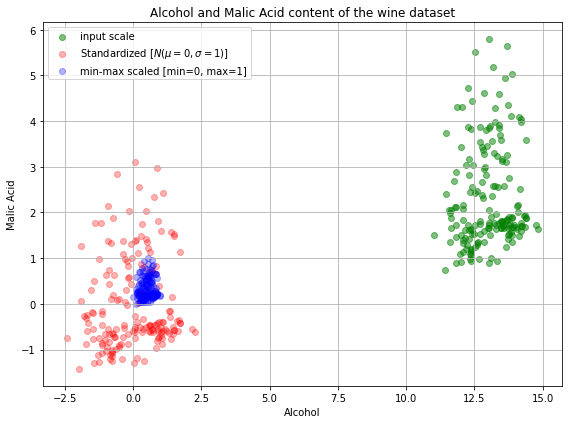

In [54]:
from matplotlib import pyplot as plt

plt.figure(figsize=(8,6))

plt.scatter(df['Alcohol'], df['Malic acid'], 
        color='green', label='input scale', alpha=0.5)

plt.scatter(df_std[:,0], df_std[:,1], color='red', 
        label='Standardized [$N(\mu=0,\sigma=1)$]', alpha=0.3)

plt.scatter(df_min_max[:,0], df_min_max[:,1], 
        color='blue', label='min-max scaled [min=0, max=1]', alpha=0.3)

plt.title('Alcohol and Malic Acid content of the wine dataset')
plt.xlabel('Alcohol')
plt.ylabel('Malic Acid')
plt.legend(loc='upper left')
plt.grid()

plt.tight_layout()
plt.show()

The plot above includes the wine datapoints on all three different scales: the input scale where the alcohol content was measured in volume-percent (green), the standardized features (red), and the normalized features (blue). In the follwing plot, we will zoom into the three different scales.

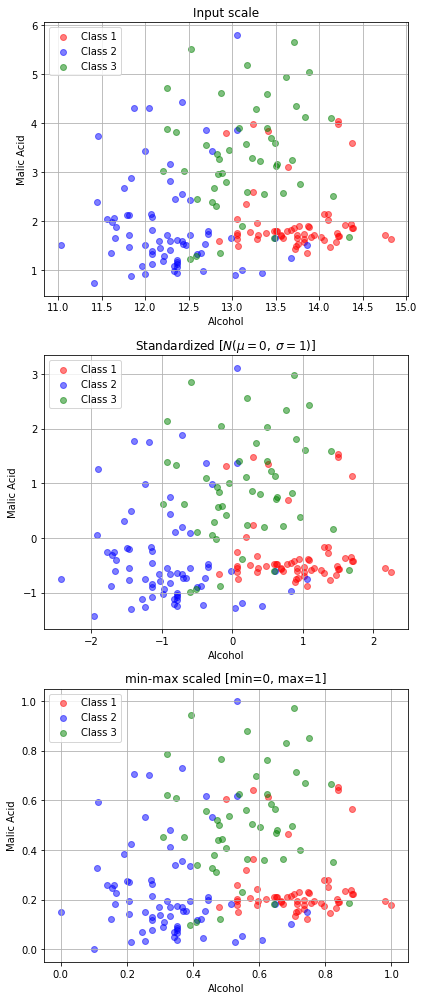

In [57]:
fig, ax = plt.subplots(3, figsize=(6,14))

for a,d,l in zip(range(len(ax)), 
               (df[['Alcohol', 'Malic acid']].values, df_std, df_min_max),
               ('Input scale', 
                'Standardized [$N  (\mu=0, \; \sigma=1)$]', 
                'min-max scaled [min=0, max=1]')
                ):
    for i,c in zip(range(1,4), ('red', 'blue', 'green')):
        ax[a].scatter(d[df['class label'].values == i, 0], 
                  d[df['class label'].values == i, 1],
                  alpha=0.5,
                  color=c,
                  label='Class %s' %i
                  )
    ax[a].set_title(l)
    ax[a].set_xlabel('Alcohol')
    ax[a].set_ylabel('Malic Acid')
    ax[a].legend(loc='upper left')
    ax[a].grid()
    
plt.tight_layout()

plt.show()

We can also do the above computation with NumPy or pure python. The scikit-learn package just makes it really simple.

#### Pure python

In [77]:
x = [1, 2, 3 ,4 ,3, 4, 9, 8, 5, 6, 7]
mean = sum(x) / len(x)
std_ = (1 / len(x) * sum((xi - mean) ** 2 for xi in x))**0.5

z_scores = [(x_i - mean) / std_ for x_i in x]
print(z_scores)

# Min-max Scaling
minmax = [(x_i - min(x)) / (max(x) - min(x)) for x_i in x]
minmax

[-1.543055355464712, -1.1290648942424721, -0.7150744330202324, -0.3010839717979927, -0.7150744330202324, -0.3010839717979927, 1.7688683343132061, 1.3548778730909665, 0.11290648942424711, 0.5268969506464869, 0.9408874118687267]


[0.0, 0.125, 0.25, 0.375, 0.25, 0.375, 1.0, 0.875, 0.5, 0.625, 0.75]

#### NumPy

In [78]:
import numpy as np

# Standardization

x_np = np.array(x)
z_scores_np = (x_np - x_np.mean()) / x_np.std()
print(z_scores)

# Min-max scaling
np_minmax = (x_np - x_np.min()) / (x_np.max() - x_np.min())
np_minmax

[-1.543055355464712, -1.1290648942424721, -0.7150744330202324, -0.3010839717979927, -0.7150744330202324, -0.3010839717979927, 1.7688683343132061, 1.3548778730909665, 0.11290648942424711, 0.5268969506464869, 0.9408874118687267]


array([0.   , 0.125, 0.25 , 0.375, 0.25 , 0.375, 1.   , 0.875, 0.5  ,
       0.625, 0.75 ])

#### Visualization

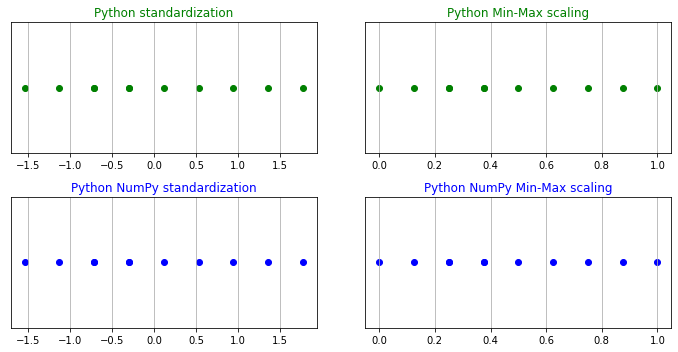

In [79]:
import matplotlib.pyplot as plt

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(10,5))

y_pos = [0 for i in range(len(x))]

ax1.scatter(z_scores, y_pos, color='g')
ax1.set_title('Python standardization', color='g')

ax2.scatter(minmax, y_pos, color='g')
ax2.set_title('Python Min-Max scaling', color='g')

ax3.scatter(z_scores_np, y_pos, color='b')
ax3.set_title('Python NumPy standardization', color='b')

ax4.scatter(np_minmax, y_pos, color='b')
ax4.set_title('Python NumPy Min-Max scaling', color='b')
    
plt.tight_layout()

for ax in (ax1, ax2, ax3, ax4):
    ax.get_yaxis().set_visible(False)
    ax.grid()

plt.show()

Principal Component Analysis (PCA) is an example where standardization is crucial since it is analyzing the variance of different features. 
Let's see how standardization effects the outcome of PCA on a supervised learning task.

#### Reading the dataset

In [80]:
df = pd.read_csv("https://raw.githubusercontent.com/rasbt/pattern_classification/master/data/wine_data.csv",
                header=None)

#### Dividing the dataset into training and test set

Here we will randomly seperate the dataset into 70% training set and 30% test set.

In [87]:
from sklearn.model_selection import train_test_split

X_wine = df.values[:, 1:]
y_wine = df.values[:, 0]

X_train, X_test, y_train, y_test = train_test_split(X_wine, y_wine, test_size=0.3, random_state=12345)

#### Feature Standardization

In [82]:
std_ = StandardScaler()

X_train_std = std_.fit_transform(X_train)
X_test_std = std_.transform(X_test)

#### Dimensionality reduction via Prrincipal Component Analysis (PCA)

We now perform PCA to transform the feature space into 2-dimensional feature subspace.

In [89]:
from sklearn.decomposition import PCA

# non-standardized data
pca = PCA(n_components=2)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

# standardized data
pca_std = PCA(n_components=2)
X_train_std = pca_std.fit_transform(X_train_std)
X_test_std = pca_std.transform(X_test_std)

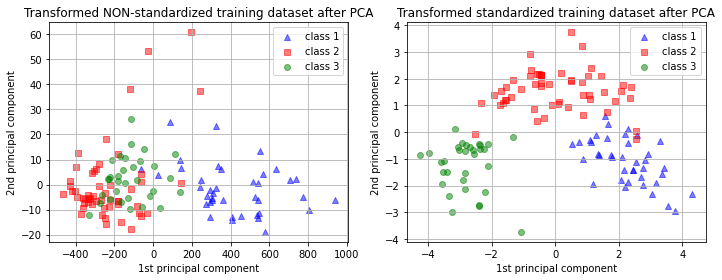

In [91]:
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10,4))


for l,c,m in zip(range(1,4), ('blue', 'red', 'green'), ('^', 's', 'o')):
    ax1.scatter(X_train[y_train==l, 0], X_train[y_train==l, 1],
        color=c, 
        label='class %s' %l, 
        alpha=0.5,
        marker=m
        )

for l,c,m in zip(range(1,4), ('blue', 'red', 'green'), ('^', 's', 'o')):
    ax2.scatter(X_train_std[y_train==l, 0], X_train_std[y_train==l, 1],
        color=c, 
        label='class %s' %l, 
        alpha=0.5,
        marker=m
        )

ax1.set_title('Transformed NON-standardized training dataset after PCA')    
ax2.set_title('Transformed standardized training dataset after PCA')    
    
for ax in (ax1, ax2):

    ax.set_xlabel('1st principal component')
    ax.set_ylabel('2nd principal component')
    ax.legend(loc='upper right')
    ax.grid()
plt.tight_layout()

plt.show()  

#### Training a naive Bayes classifier

The name "naive" comes from the independence assumptions of the classifier. It assumes that given the label all the features are independent from each other. 

In [93]:
from sklearn.naive_bayes import GaussianNB

# on non-standardized data
gnb = GaussianNB()
model = gnb.fit(X_train, y_train)

# on standardized data
gnb_std = GaussianNB()
model_ = gnb_std.fit(X_train_std, y_train)

#### Evaluating the model on training and test set

In [96]:
print(f"Prediction accuracy for the training dataset (non-standardized): {model.score(X_train, y_train)*100:.2f}%")
print(f"\nPrediction accuracy for the test dataset (non-standardized): {model.score(X_test, y_test)*100:.2f}%")

Prediction accuracy for the training dataset (non-standardized): 81.45%

Prediction accuracy for the test dataset (non-standardized): 64.81%


In [98]:
print(f"Prediction accuracy for the training dataset (standardized): {model_.score(X_train_std, y_train)*100:.2f}%")
print(f"\nPrediction accuracy for the test dataset (standardized): {model_.score(X_test_std, y_test)*100:.2f}%")

Prediction accuracy for the training dataset (standardized): 96.77%

Prediction accuracy for the test dataset (standardized): 98.15%


We can see that the outcome is much better with the scaled dataset.